In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl 
import seaborn as sns 
from io import StringIO
plt.rc('font', serif='Helvetica Neue') 

In [2]:
# read snpEff genes table that shows how many variants per found gene were detected...
snpEff_genes = pd.read_table("snpEff_genes.tsv", sep="\t")
snpEff_genes = snpEff_genes.rename( columns = {i: i.strip() for i in snpEff_genes.columns})
snpEff_genes["GeneId"] = [i.strip() for i in snpEff_genes["GeneId"]]
# read interesting canddates table 
our_candidates = pd.read_csv("results/tables/candidates.csv")

In [3]:
snp_Eff_candidates = snpEff_genes.query(f"GeneId in {list(our_candidates['Gene'])}")
snp_Eff_candidates

#GeneName   GeneId  \
1236  LAS1                                          ...  YKR063C   
1612  NSR1                                          ...  YGR159C   
1623  NUP133                                        ...  YKR082W   
1626  NUP188                                        ...  YML103C   
1629  NUP57                                         ...  YGR119C   
2183  RPL8A                                         ...  YHL033C   
2265  RSA3                                          ...  YLR221C   
2611  SRP40                                         ...  YKR092C   
2939  URB1                                          ...  YKL014C   

         TranscriptId          BioType  variants_impact_HIGH  \
1236  YKR063C_mRNA     protein_coding                      0   
1612  YGR159C_mRNA     protein_coding                      1   
1623  YKR082W_mRNA     protein_coding                      0   
1626  YML103C_mRNA     protein_coding                      0   
1629  YGR119C_mRNA     protein_coding                      0   
2183  YHL033C_mRNA     protein_coding                      0   
2265  YLR221C_mRNA     protein_coding                      0   
2611  YKR092C_mRNA     protein_coding                      0   
2939  YKL014C_mRNA     protein_coding                      0   

      variants_impact_LOW  variants_impact_MODERATE  variants_impact_MODIFIER  \
1236                    3                         9                        57   
1612                    2                         8                        41   
1623                    6                         8                        78   
1626                    8                         7                        45   
1629                    5                         8                        95   
2183                    4                         2                        60   
2265                    1                         3                        30   
2611                    9                         7                        53   
2939                   21                        16                        33   

      variants_effect_conservative_inframe_deletion  \
1236                                              0   
1612                                              0   
1623                                              0   
1626                                              1   
1629                                              0   
2183                                              0   
2265                                              0   
2611                                              0   
2939                                              0   

      variants_effect_conservative_inframe_insertion  ...  \
1236                                               5  ...   
1612                                               0  ...   
1623                                               0  ...   
1626                                               0  ...   
1629                                               3  ...   
2183                                               0  ...   
2265                                               0  ...   
2611                                               3  ...   
2939                                               0  ...   

      variants_effect_non_coding_transcript_exon_variant  \
1236                                                  0    
1612                                                  0    
1623                                                  0    
1626                                                  0    
1629                                                  0    
2183                                                  0    
2265                                                  0    
2611                                                  0    
2939                                                  0    

      variants_effect_splice_acceptor_variant  \
1236                                        0   
1612                                        0   
162

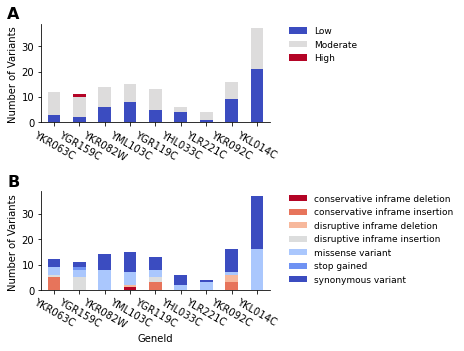

In [4]:
# let's make a barchart showing the number of X impact variants for each candidate
fig, axs = plt.subplots(2, figsize = (7, 5), facecolor = "None")
snp_Eff_candidates.plot.bar(
    x = "GeneId", 
    y = ["variants_impact_LOW", "variants_impact_MODERATE", "variants_impact_HIGH"], 
    label = ["Low", "Moderate", "High"], 
    ylabel = "Number of Variants ", xlabel = "",
    stacked=True, cmap = "coolwarm",
    rot = -30,
    ax = axs[0],
)

_all_effects = [i for i in snp_Eff_candidates.columns if "variants_effect_" in i and not all(snp_Eff_candidates[i] == 0)]
_ignore = ["variants_effect_downstream_gene_variant","variants_effect_upstream_gene_variant"]
for i in _ignore:
    _all_effects.remove(i)
all_effects = [i.replace("variants_effect_", "") for i in _all_effects]
all_effects = [i.replace("_", " ") for i in all_effects]
all_effects


snp_Eff_candidates.plot.bar(
    x = "GeneId", y = _all_effects, 
    ylabel = "Number of Variants ",
    label = all_effects,
    stacked = True,
    cmap = "coolwarm_r",
    rot = -30,
    ax = axs[1],
)

c = 65
for ax in axs:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend(
                bbox_to_anchor=(1.05, 1.05), 
                fontsize = 9, 
                frameon=False
            )
    ax.text( # add A B C... as labels for subplots
        x = -0.15, y = 1.05, s = chr(c),
        fontsize = 16, weight = "bold", 
        transform = ax.transAxes # use fractions of axes ^^
    )
    c += 1

# plt.suptitle("Summary of Variants in primary candidate genes", weight = "bold", fontsize = 12)
plt.tight_layout()
plt.savefig("../Report/Resources/Figures/primary_candidates_variant_summary.png",  facecolor=fig.get_facecolor(), transparent=True, dpi = 600)


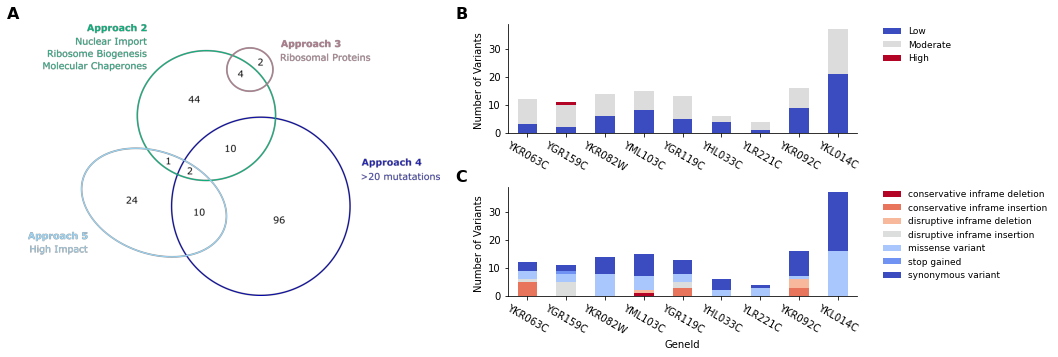

In [5]:
# let's make a barchart showing the number of X impact variants for each candidate
# now we incorporate the venn diagram as well...

fig = plt.figure(figsize = (17, 5), facecolor = "None")

grid = fig.add_gridspec(2, 6)

venn = fig.add_subplot(grid[:, :4])
upper = fig.add_subplot(grid[0, 4:])
lower = fig.add_subplot(grid[1, 4:])


snp_Eff_candidates.plot.bar(
    x = "GeneId", 
    y = ["variants_impact_LOW", "variants_impact_MODERATE", "variants_impact_HIGH"], 
    label = ["Low", "Moderate", "High"], 
    ylabel = "Number of Variants ", xlabel = "",
    stacked=True, cmap = "coolwarm",
    rot = -30,
    ax = upper,
)

_all_effects = [i for i in snp_Eff_candidates.columns if "variants_effect_" in i and not all(snp_Eff_candidates[i] == 0)]
_ignore = ["variants_effect_downstream_gene_variant","variants_effect_upstream_gene_variant"]
for i in _ignore:
    _all_effects.remove(i)
all_effects = [i.replace("variants_effect_", "") for i in _all_effects]
all_effects = [i.replace("_", " ") for i in all_effects]
all_effects


snp_Eff_candidates.plot.bar(
    x = "GeneId", y = _all_effects, 
    ylabel = "Number of Variants ",
    label = all_effects,
    stacked = True,
    cmap = "coolwarm_r",
    rot = -30,
    ax = lower,
)

# add venn
venn.imshow(plt.imread("../Figures/candidates_venn.png"))
venn.text( # add A B C... as labels for subplots
        x = -0.05, y = 1.02, s = chr(65),
        fontsize = 16, weight = "bold", 
        transform = venn.transAxes # use fractions of axes ^^
    )
venn.axis("off")


c = 66
for ax in [upper, lower]:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend(
                bbox_to_anchor=(1.05, 1.05), 
                fontsize = 9, 
                frameon=False
            )
    ax.text( # add A B C... as labels for subplots
        x = -0.15, y = 1.05, s = chr(c),
        fontsize = 16, weight = "bold", 
        transform = ax.transAxes # use fractions of axes ^^
    )
    c += 1

fig.subplots_adjust(wspace = -0.25, hspace = 0.5)

# plt.suptitle("Summary of Variants in primary candidate genes", weight = "bold", fontsize = 12)
# plt.tight_layout()
plt.savefig("../Report/Resources/Figures/primary_candidates_figure.png",  facecolor=fig.get_facecolor(), transparent=True, dpi = 600, bbox_inches = "tight")


<AxesSubplot:xlabel='Sample', ylabel='Reads'>

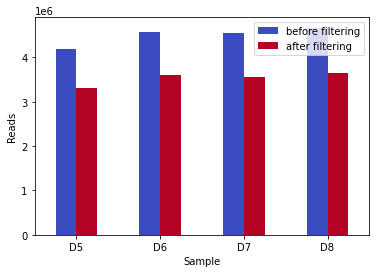

In [188]:
# now we make some figure about the found reads for each D5678 and how many were retained by fastp...
import json, os
# read json files
fastp_reports = {}
n = 5
for i in os.listdir("fastp_jsons"):
    with open(os.path.join("fastp_jsons", i), "r") as f:
        content = json.load(f)
        
        fastp_reports.update({f"D{n}" : content})
        n+=1

reads_overview = {
    "sample" : [],
    "pre" : [],
    "post" : [],
}

for sample, report in fastp_reports.items():
    reads_overview["sample"].append(sample)
    reads_overview["pre"].append(report["summary"]["before_filtering"]["total_reads"])
    reads_overview["post"].append(report["summary"]["after_filtering"]["total_reads"])

reads_overview = pd.DataFrame(reads_overview)

reads_overview.plot.bar(
    x = "sample",
    y = ["pre", "post"],
    rot = 0, 
    cmap = "coolwarm",
    ylabel = "Reads",
    xlabel = "Sample",
    label = ["before filtering", "after filtering"]
    )

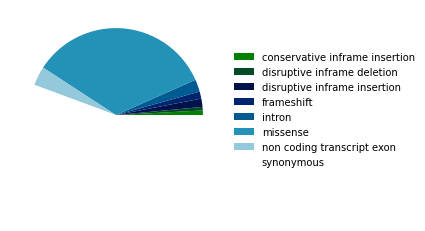

In [467]:
# copied from the html snpeff summary (there was no useful format only the html...)
_snpeff_summ_variant_types = """Type	 	Count	Percent
conservative_inframe_deletion	 	14	0.016%
conservative_inframe_insertion	 	60	0.068%
disruptive_inframe_deletion	 	46	0.052%
disruptive_inframe_insertion	 	109	0.123%
downstream_gene_variant	 	36,819	41.619%
frameshift_variant	 	94	0.106%
intergenic_region	 	6,374	7.205%
intragenic_variant	 	1	0.001%
intron_variant	 	161	0.182%
missense_variant	 	2,416	2.731%
non_coding_transcript_exon_variant	 	251	0.284%
splice_acceptor_variant	 	1	0.001%
splice_donor_variant	 	2	0.002%
splice_region_variant	 	29	0.033%
start_lost	 	10	0.011%
stop_gained	 	39	0.044%
stop_lost	 	11	0.012%
stop_retained_variant	 	10	0.011%
synonymous_variant	 	3,935	4.448%
upstream_gene_variant	 	38,085	43.05%"""

snpeff_summ_variant_types = _snpeff_summ_variant_types.replace("%", "").replace("\t\t", "\t")
snpeff_summ_variant_types = pd.read_table(StringIO(snpeff_summ_variant_types))
snpeff_summ_variant_types["labels"] = [i.replace("_variant", "" ).replace("_", " ") for i in snpeff_summ_variant_types["Type"]]
snpeff_summ_variant_types = snpeff_summ_variant_types.set_index("labels")
_ignore = ["upstream_gene_variant", "downstream_gene_variant", "intergenic_region"]
snpeff_summ_variant_types = snpeff_summ_variant_types.query(f"Type not in {_ignore}")
snpeff_summ_variant_types = snpeff_summ_variant_types.query("Percent >= 0.05")
snpeff_summ_variant_types
snpeff_summ_variant_types.plot.pie(
    labeldistance = None,
    label = "labels",
    ylabel = "",
    y = "Percent", cmap = "ocean",
    )


plt.legend(bbox_to_anchor=(1,0.83), frameon=False)

<AxesSubplot:>

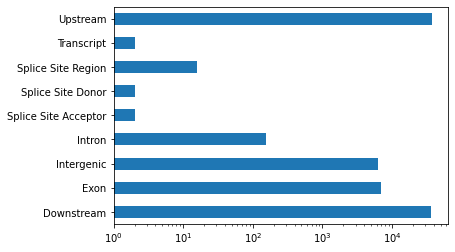

In [244]:
_snpeff_summ_variant_regions = """Type	 	Count	Percent
Downstream	 	36,819	41.64%
Exon	 	6,971	7.884%
Intergenic	 	6,374	7.209%
Intron	 	155	0.175%
Splice_Site_Acceptor	 	1	0.001%
Splice_Site_Donor	 	1	0.001%
Splice_Site_Region	 	15	0.017%
Transcript	 	1	0.001%
Upstream	 	38,085	43.072%"""
snpeff_summ_variant_regions = _snpeff_summ_variant_regions.replace("%", "").replace("\t\t", "\t").replace("_", " ").replace(",", "")
snpeff_summ_variant_regions = pd.read_table(StringIO(snpeff_summ_variant_regions))
snpeff_summ_variant_regions.plot.barh(
    x = "Type", y = "Count", log = True,
    rot = 0, legend = False, xlabel = "", ylabel = "Number of Variants", 
)

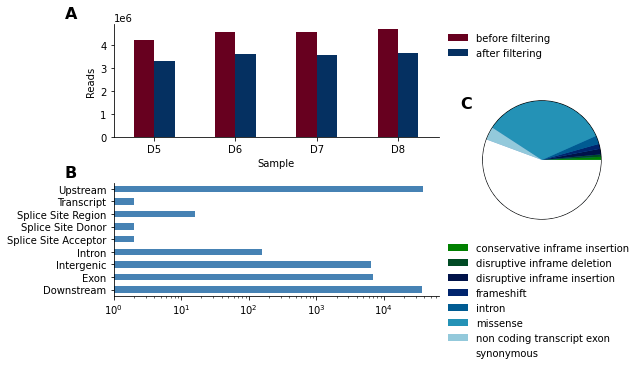

In [472]:
# now we assemble a total figure with the three above...
fig = plt.figure(constrained_layout=False, figsize = (9, 5))

grid = fig.add_gridspec(2, 3)

ro = fig.add_subplot(grid[0, :2])
vr = fig.add_subplot(grid[1,:2])
vt = fig.add_subplot(grid[: , 2:])


reads_overview.plot.bar(
    x = "sample",
    y = ["pre", "post"],
    rot = 0, 
    cmap = "RdBu",
    ylabel = "Reads",
    xlabel = "Sample",
    label = ["before filtering", "after filtering"],
    ax = ro
    )
ro.legend(bbox_to_anchor=(1.0, 1.0), frameon=False)

snpeff_summ_variant_regions.plot.barh(
    x = "Type", y = "Count", log = True,
    rot = 0, legend = False, xlabel = "", ylabel = "Number of Variants", 
    ax = vr, color = "steelblue",

)

# blank pie chart to add an edge around the whole instead of each wedge separately...
wedges, texts = vt.pie([1], colors = ["black"])
for w in wedges:
    w.set_edgecolor = "black"
    w.set_linewidth = 100


# empty pie chart to get a border around the actual one...
n = vt.pie([1], normalize = False)
n[0][0].set_alpha(1)
n[0][0].set_edgecolor("black")
n[0][0].set_linewidth(1.2)

snpeff_summ_variant_types.plot.pie(
    labeldistance = None,
    label = "labels",
    ylabel = "",
    y = "Percent", cmap = "ocean",
    ax = vt
    )
vt.legend(bbox_to_anchor=(1.15,0), frameon=False)


for i in [ro, vr]:
    i.axes.spines['top'].set_visible(False)
    i.axes.spines['right'].set_visible(False)


plt.subplots_adjust(
    hspace = 0.4, wspace = 0.2, 
)

c = 65
for ax in [ro, vr]:
    ax.text( # add A B C... as labels for subplots
        x = -0.15, y = 1.05, s = chr(c),
        fontsize = 16, weight = "bold", 
        transform = ax.transAxes # use fractions of axes ^^
    )
    c += 1
vt.text(
    x = -0.05, y = .85, s = chr(c),
    fontsize = 16, weight = "bold", 
    transform = vt.transAxes # use fractions of axes ^^
)
plt.savefig("../Report/Resources/Figures/reads_summary.png", facecolor=fig.get_facecolor(), transparent=True, dpi = 600,  bbox_inches = "tight")

In [399]:
snpeff_summ_variant_types
psum = sum(snpeff_summ_variant_types["Percent"])
snpeff_summ_variant_types["Percent"] / psum *100

labels
conservative inframe insertion     0.850638
disruptive inframe deletion        0.650488
disruptive inframe insertion       1.538654
frameshift                         1.325994
intron                             2.276708
missense                          34.163122
non coding transcript exon         3.552664
synonymous                        55.641731
Name: Percent, dtype: float64